### DIMENSIONALITY REDUCTION


In [183]:
import pandas as pd
import glob
from pathlib import Path  # Importing the Path class from the pathlib module
import numpy as np
import time
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import os 
import math
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [184]:
#GLOBAL VARIABLES
# Define the programmer whose path you want to use
programmer = 'esther'

#variables for paths names
file_paths_names = {
    'patricia': r"..\original_data",
    'esther': r"C:\Users\egh22\OneDrive - University of Canterbury\bootcamp\group project\data"
}

files_outcome_path_names = {
    'patricia': r"..\original_data\outcomes",
    'esther': r"C:\Users\egh22\OneDrive - University of Canterbury\bootcamp\group project\data\outcomes"
}


files_path_to_save_files = {
    'patricia': r"..\clean_data",
    'esther': r"C:\Users\egh22\OneDrive - University of Canterbury\bootcamp\group project\clean_data"
}

# Choose the file path based on the programmer variable
file_path_to_save = files_path_to_save_files[programmer]

#VARIABLES FOR DIMEN REDUCTION
variability_explained = 0.85

In [185]:
#modify this with the name of the paths to read
files_outcome_path =  files_outcome_path_names[programmer]
df_target_a = pd.read_csv(Path(files_outcome_path) / "Outcomes-a.txt")
df_target_b = pd.read_csv(Path(files_outcome_path) / "Outcomes-b.txt")

outcomes_df = pd.concat([df_target_a, df_target_b], ignore_index=True)


### 1. PCA
<b> PCA - Principal Component Analysis </b> <br>
- It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized, with the maximum variance, maximum information is preserved. In another words, it selects the hyperplane(s) that minimizes the mean squared distance between the original dataset and its projection onto that hyperplane(s).
- The first principle component accounts for the maximum variance in the data and so on.
- All the components in lower-dimensional space are linearly uncorrelated.
- Each of the new features or components created after PCA are all independent of one another.

In [186]:
def perform_pca(data, n_components=None):
    """
    Perform Principal Component Analysis (PCA) on the given DataFrame.

    Parameters:
    data (DataFrame): The input DataFrame containing the features.
    n_components (int or None): Number of components to keep. If None, all components are kept.
    variance_threshold (float or None): The threshold of cumulative variance explained to stop at.

    Returns:
    pca_result (DataFrame): DataFrame containing the transformed features after PCA.
    pca (PCA): PCA object fitted on the data.
    explained_variance_ratio (array): Explained variance ratio of each selected component.
    """

    # Remove records from dataframe
    record_ID = data['RecordID']
    data.drop(['MechVent_start','RecordID'], inplace=True, axis=1)
    
    # Step 1: Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Step 2: Perform PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_data)

    # Convert the result to a DataFrame
    pca_result_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])


    # Plot the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Ratio Explained')  # Update y-axis label
    plt.title('Variance Ratio Explained by Each Principal Component')

    # Set y-axis limits dynamically based on maximum explained variance ratio
    plt.ylim(0, np.max(explained_variance_ratio) * 1.1)

    # Set y-axis ticks and labels
    y_ticks = np.linspace(0, np.max(explained_variance_ratio) * 1.1, num=11)
    plt.yticks(y_ticks)
    plt.gca().set_yticklabels(['{:.3f}'.format(x) for x in plt.gca().get_yticks()])

    plt.show()

     # Print the number of components required to achieve the specified variance explained
    if n_components is not None:
        cumulative_variance = np.cumsum(explained_variance_ratio)
        num_components_threshold = np.argmax(cumulative_variance >= n_components) + 1
        print(f"Number of components required to achieve {n_components:.2f} variance explained: {num_components_threshold}")

    #bring back the RecordID
    pca_result_df['RecordID'] = record_ID

    return pca_result_df, pca, explained_variance_ratio

####  1.1 Applying PCA to KNN imputed dataframe

In [187]:
#loading dataframe
knn_df = pd.read_csv(os.path.join(file_path_to_save, 'KNN_imputed_df.csv')) 

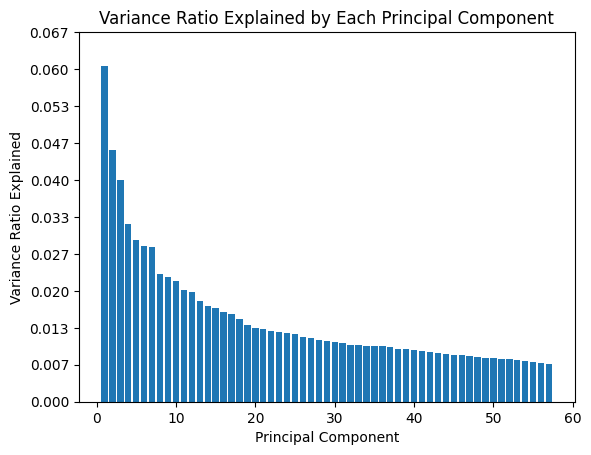

Number of components required to achieve 0.85 variance explained: 57


(8000, 58)

In [188]:
#applying PCA
pca_knn_df, pca, explained_variance_ratio = perform_pca(knn_df, variability_explained)
pca_knn_df.shape


In [189]:
# Merge data_pca with clean_dataframe_with_NaN
pca_knn_df = pd.merge(pca_knn_df, outcomes_df, on='RecordID', how='outer')
#save dataframe 
pca_knn_df.to_csv(os.path.join(file_path_to_save, "PCA_KNN_imputed.csv"), index=False)

####  1.2 Applying PCA to -1 imputed dataframe

In [190]:
#loading dataset
minus1_df = pd.read_csv(os.path.join(file_path_to_save, 'minus1_imputed_df.csv'))
      

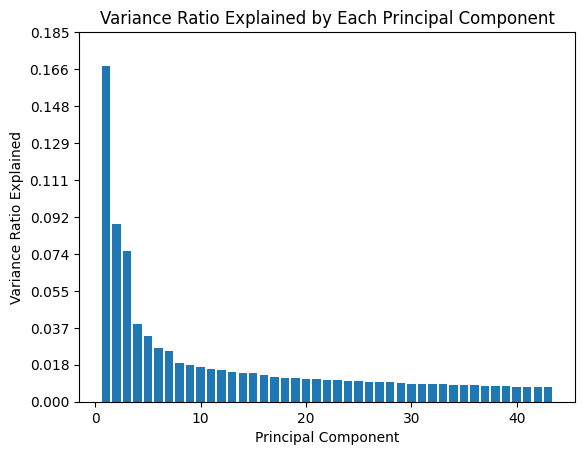

Number of components required to achieve 0.85 variance explained: 43


(8000, 44)

In [191]:
#applying PCA
pca_minus1_df, pca, explained_variance_ratio = perform_pca(minus1_df, variability_explained)
pca_minus1_df.shape


In [192]:
# Merge data_pca with clean_dataframe_with_NaN
pca_minus1_df = pd.merge(pca_minus1_df, outcomes_df, on='RecordID', how='outer')
#save dataframe 
pca_minus1_df.to_csv(os.path.join(file_path_to_save, "PCA_minus1_imputed.csv"), index=False)